## <span style="color:red"> <strong> Capital Asset Pricing Model (CAPM) with OLS </strong>

The Capital Asset Pricing Model (CAPM) describes the relationship between the expected return of assets and the systematic risk of the market. CAPM indicates that the expected return of an asset is equal to the risk-free return plus a risk premium. The assumption of CAPM is that investors are rational and want to maximize return and reduce risk as much as possible. Thus, the goal of CAPM is to calculate what return an investor can expect to get for a given risk premium over the risk-free rate.

<strong>Some terminologies:</strong>

* `Risk-Free Rate` - the minimum rate of return expected on investment with zero risks by the investor. One example is Treasury Bills backed by U.S. government
  
* `Risk Premium` - a measure of excess return that is required by an individual to compensate being subjected to an increased level of risk
* `Market Return` - defined as the wealth-weighted sum of all investment returns in the economy. One example is S&P 500, which is a market capitalization-weighted index of the 500 largest U.S. publicly traded companies
* `Beta` - a measure of a stock's volatility in relation to the overall market. If beta of an individual stock = 1, this means its price is perfectly correlated with the market; if beta < 1, which is referred to as "defensive", this indicates the security is theoretically less volatile than the market; if beta > 1, or "aggresive", this indicates the assets price is more volatile than the market

<strong>CAPM Formula:</strong>

$$
\begin{aligned}
r_e = r_f + \beta (r_m - r_f)
\end{aligned}
$$

Where:

* $r_e$ : expected return of a security
* $r_f$ : risk-free rate
* $r_m-r_f$ : risk premium
* $\beta$ : the beta of the security relative to the market


### Normalize & Visualize Data

In [62]:
#Load data
import pandas as pd
df = pd.read_csv("data/stock.csv")
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


This table contains the stock prices of 8 companies (Apple, Bank of America, Agilent Technologies, MGM Resorts, Amazon, IBM, Tesla, Google) from 2012-01-12 to 2020-08-11.

In [63]:
#Normalize data
def calculate_return(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i] / x[i][0]
    
    return x

normalized_df = calculate_return(df)
normalized_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666


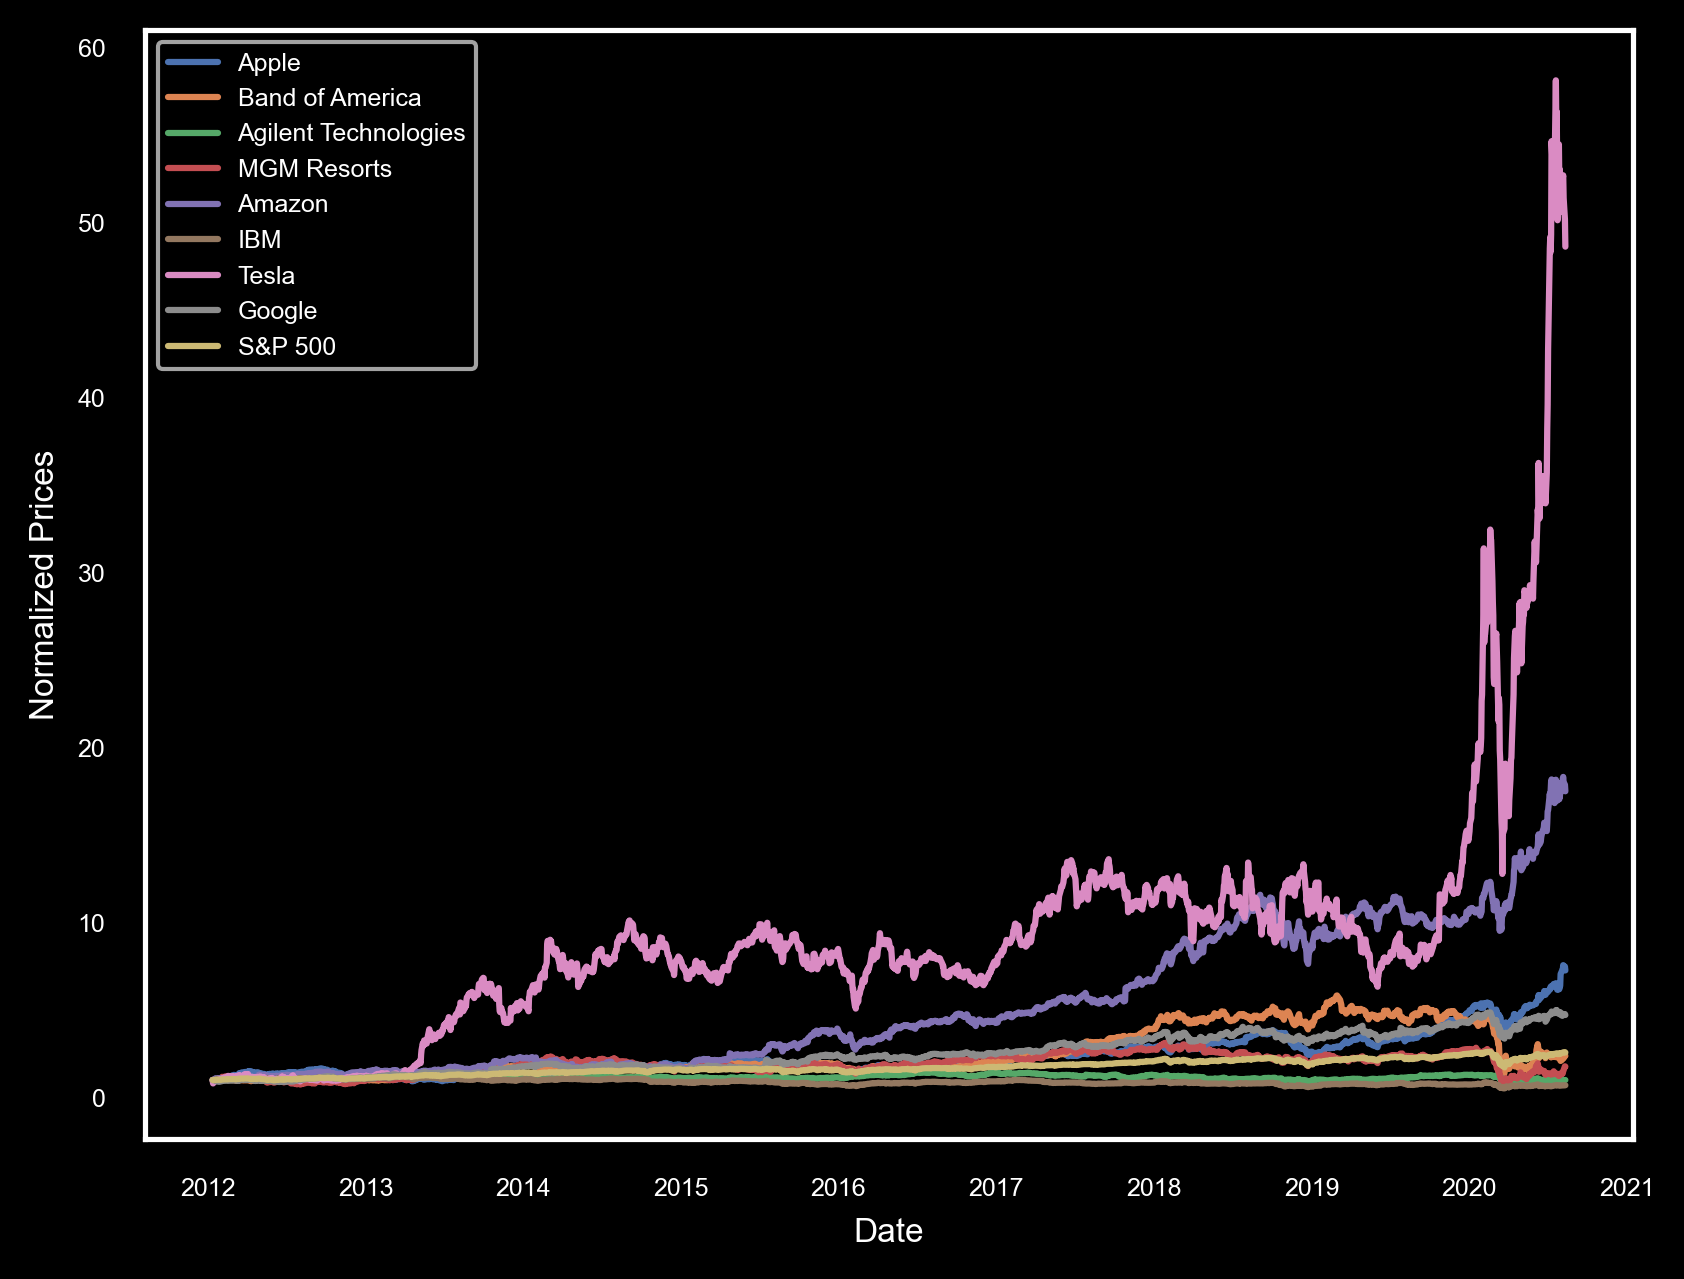

In [64]:
#Visualize Data
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

matplotlib.rc_file_defaults()
matplotlib.rcParams['figure.dpi'] = 300
axis_font = {'fontname':'Arial', 'size':'8', 'color': "white"}
tick_font = {'fontname':'Arial', 'size':'6', 'color': "white"}
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
new_style = {'grid': False}
matplotlib.rc('axes', **new_style)

sns.lineplot(x="Date", y="AAPL", data=normalized_df, label="Apple")
sns.lineplot(x="Date", y="BA", data=normalized_df, label="Band of America")
sns.lineplot(x="Date", y="T", data=normalized_df, label="Agilent Technologies")
sns.lineplot(x="Date", y="MGM", data=normalized_df, label="MGM Resorts")
sns.lineplot(x="Date", y="AMZN", data=normalized_df, label="Amazon")
sns.lineplot(x="Date", y="IBM", data=normalized_df, label="IBM")
sns.lineplot(x="Date", y="TSLA", data=normalized_df, label="Tesla")
sns.lineplot(x="Date", y="GOOG", data=normalized_df, label="Google")
sns.lineplot(x="Date", y="sp500", data=normalized_df, label="S&P 500")

plt.xticks(**tick_font)
plt.yticks(**tick_font)
plt.xlabel("Date", **axis_font)
plt.ylabel("Normalized Prices", **axis_font)
legend = plt.legend(fontsize=6)
for text in legend.get_texts():
    text.set_color("white")
plt.show()

### Calculate Daily Returns 

In [65]:
def daily_return(df):
    df_daily_return = df.copy()
    for i in df.columns[1:]:
        for j in range(1, len(df)):
            df_daily_return[i][j] = ((df[i][j] - df[i][j-1]) / df[i][j-1] ) * 100
        df_daily_return[i][0] = 0
    return df_daily_return

stocks_daily_return = daily_return(df)
stocks_daily_return.head()

/var/folders/cf/3kbbttcn1g35qhk6ldvlg1lh0000gn/T/ipykernel_74858/4025789828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_return[i][j] = ((df[i][j] - df[i][j-1]) / df[i][j-1] ) * 100
/var/folders/cf/3kbbttcn1g35qhk6ldvlg1lh0000gn/T/ipykernel_74858/4025789828.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_return[i][0] = 0


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866


### Build a CAPM Model Using OLS for APPL

* Independent variable: $r_m$, daily market return
* Dependent variable: $r_{APPL}$, daily return of APPL 
* Assumption: $r_f = 0$
* $r_{APPL} = \beta * r_m$



In [67]:
import statsmodels.api as sm

y = stocks_daily_return["AAPL"]
x = stocks_daily_return["sp500"]
results = sm.OLS(y, x).fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   AAPL   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.433
Method:                 Least Squares   F-statistic:                              1650.
Date:                Sat, 31 Dec 2022   Prob (F-statistic):                   2.03e-268
Time:                        22:29:54   Log-Likelihood:                         -3693.7
No. Observations:                2159   AIC:                                      7389.
Df Residuals:                    2158   BIC:                                      7395.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As is shown above, the beta for APPL is 1.1153, which means that APPL stock price is more volatile than the market.

* $R^2$ = 43.3%, indicating that 43.3% of the daily return variation of APPL can be explained by market daily return
* P-value = 0, indicating that the outcome of the model is significant at almost any level